# Word embedding

This notebooks contains the code to create word embeddings for recipes in order to link with the ingredients to a wine.

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

In [3]:
# Open the json file
with open('../data/recipe_transformed_data.json', encoding="utf8") as f:
    data_raw = json.load(f)

data_raw['recipes'] = data_raw['recipes']

# Take only 1 data of 5
data_raw['recipes'] = data_raw['recipes'][::5]
print(len(data_raw['recipes']))

# Set the translator
translator = GoogleTranslator(source='auto', target='en')

print(data_raw['recipes'])

3401
[{'name': 'Tartiflette : la vraie recette', 'type': 'Plat principal', 'ingredients': ['oignon émincés', 'reblochon bien fait', 'huile', 'sel', 'poivre', 'pomme de terre', 'lardons fumés', 'ail'], 'url': 'https://www.marmiton.org/recettes/recette_la-vraie-tartiflette_17634.aspx'}, {'name': 'Rôti de boeuf au four tout simple', 'type': 'Plat principal', 'ingredients': ['huile olive', 'eau', 'poivre', 'sel', 'thym', 'rôti de boeuf bardé', 'ail'], 'url': 'https://www.marmiton.org/recettes/recette_roti-de-boeuf-au-four-tout-simple_342546.aspx'}, {'name': 'Fondue aux poireaux', 'type': 'Accompagnement', 'ingredients': ['poireau', 'beurre', 'moutarde de Dijon', 'crème fraîche', 'sel', 'poivre du moulin', 'jus de citron'], 'url': 'https://www.marmiton.org/recettes/recette_fondue-de-poireaux_20348.aspx'}, {'name': 'Pâtes à la "carbonara" à la française', 'type': 'Plat principal', 'ingredients': ['crème fraîche', 'sel', 'poivre', 'lardons selon préférence', 'oignon', 'pâtes', 'jaunes oeuf'],

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\laure\AppData\Roaming\nltk_data...
[nltk_data]    | 

True

In [5]:
# Make histogram of the 100 most used word in the recipe
def make_histogram(data_raw):
    count = {}
    for recipe in data_raw['recipes']:
        for ingredient in recipe['ingredients']:
            try:
                # Translate the ingredient in english
                ingredient = translator.translate(ingredient)
                # Remove numbers
                ingredient = ''.join([i for i in ingredient if not i.isdigit()])
                # Remove stop words
                stop_words = set(stopwords.words('english'))
                word_tokens = word_tokenize(ingredient)
                ingredient = [w for w in word_tokens if not w in stop_words]
                # Count the number of time the ingredient is used
                for word in ingredient:
                    if word in count:
                        count[word] += 1
                    else:
                        count[word] = 1
            except:
                continue
    return count

In [6]:
count = make_histogram(data_raw)
# Sort the dictionary
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1], reverse=True)}

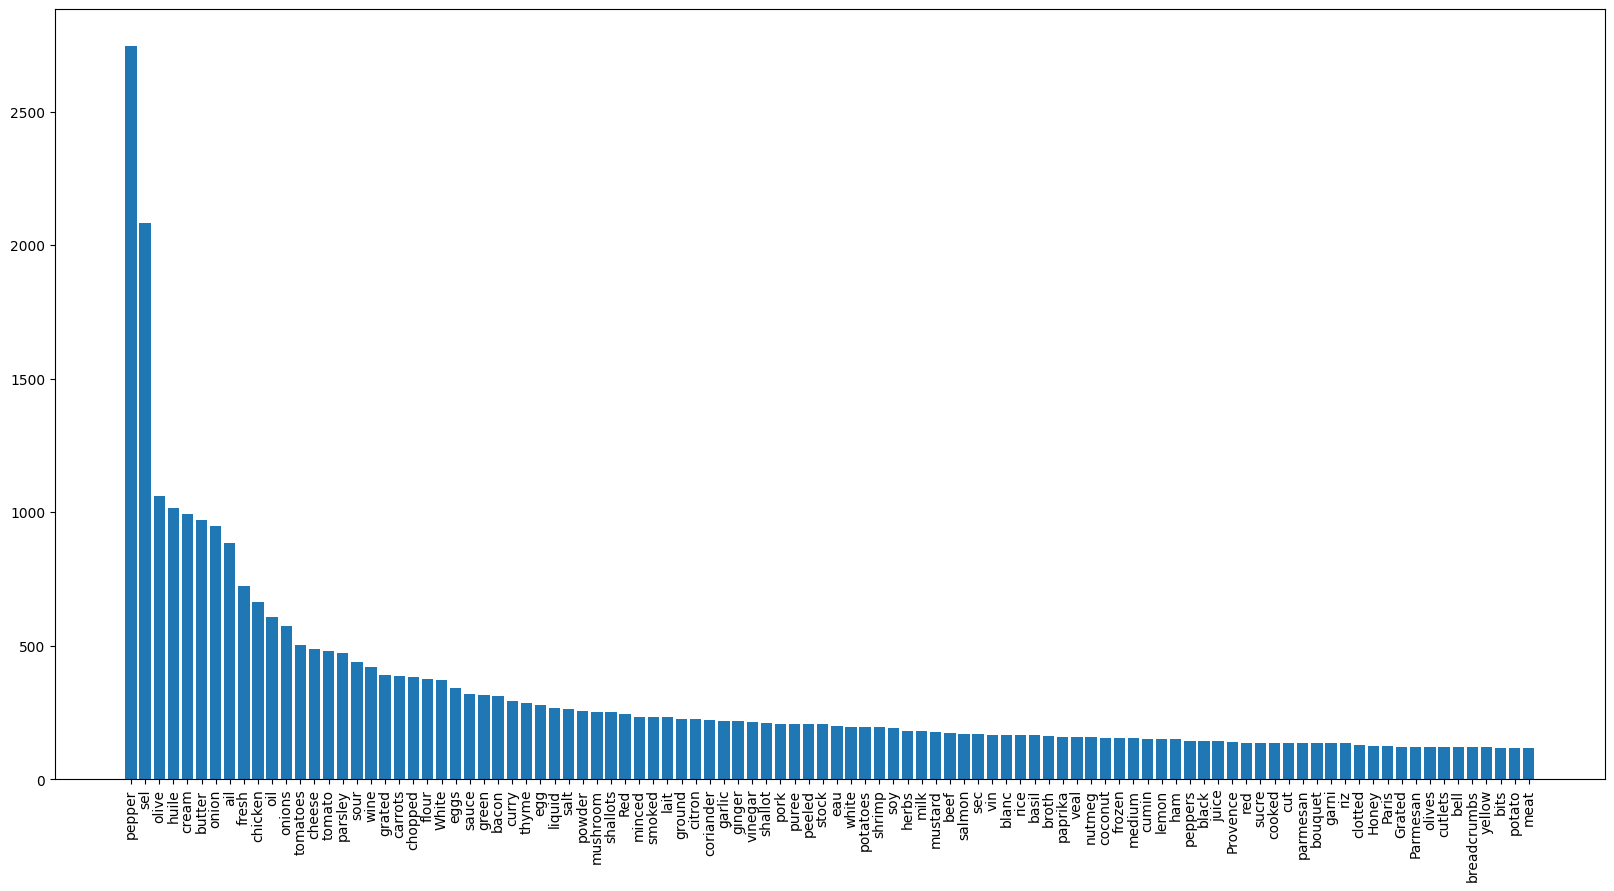

In [7]:
# Do a histogram of the 100 most used word
plt.figure(figsize=(20, 10))
plt.bar(list(count.keys())[:100], list(count.values())[:100])
plt.xticks(rotation=90)
plt.show()

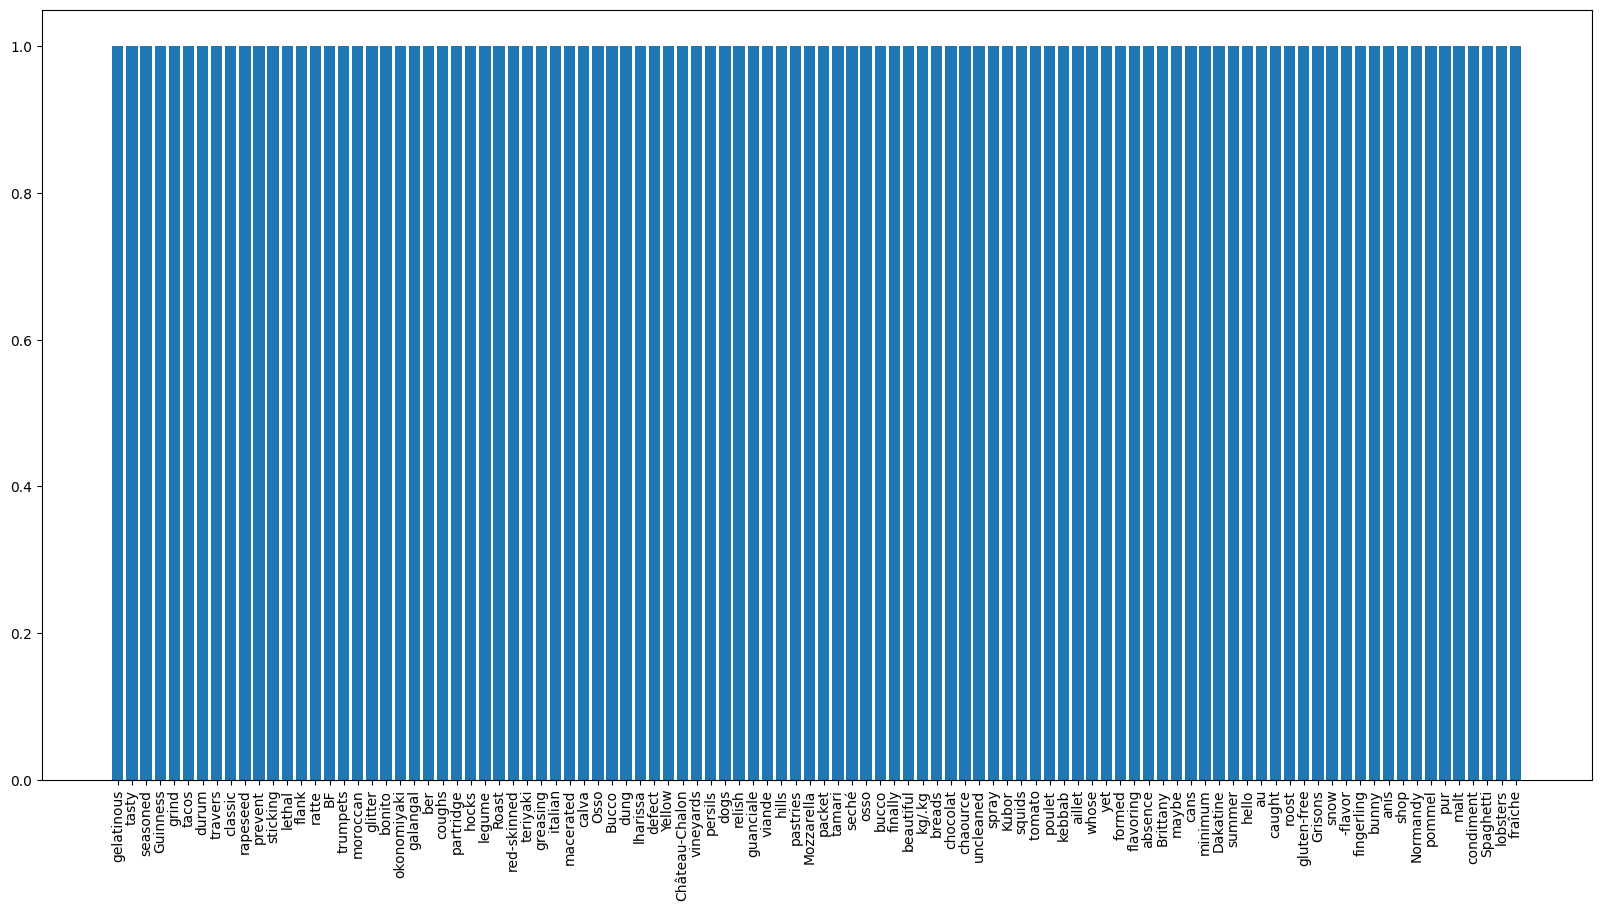

In [8]:
# Reverse the list to have the least used word first
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}

# Do a histogram of the 100 least used word
plt.figure(figsize=(20, 10))
plt.bar(list(count.keys())[:100], list(count.values())[:100])
plt.xticks(rotation=90)
plt.show()

In [9]:
# For each key value pair in the dictionary, count how many time the word is less used than 5 times
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}
count_less_5 = 0
for key, value in count.items():
    if value < 5:
        count_less_5 += 1
print(count_less_5)

# Take all the word that are used less than 5 times and put them in a list
count = {k: v for k, v in sorted(count.items(), key=lambda item: item[1])}
count_less_5 = []
for key, value in count.items():
    if value < 5:
        count_less_5.append(key)
print(count_less_5)

1574
['gelatinous', 'tasty', 'seasoned', 'Guinness', 'grind', 'tacos', 'durum', 'travers', 'classic', 'rapeseed', 'prevent', 'sticking', 'lethal', 'flank', 'ratte', 'BF', 'trumpets', 'moroccan', 'glitter', 'bonito', 'okonomiyaki', 'galangal', 'ber', 'coughs', 'partridge', 'hocks', 'legume', 'Roast', 'red-skinned', 'teriyaki', 'greasing', '\u200b\u200bitalian', 'macerated', 'calva', 'Osso', 'Bucco', 'dung', 'lharissa', 'defect', 'Yellow', 'Château-Chalon', 'vineyards', 'persils', 'dogs', 'relish', 'guanciale', 'viande', 'hills', 'pastries', 'Mozzarella', 'packet', 'tamari', 'seché', 'osso', 'bucco', 'finally', 'beautiful', 'kg/.kg', 'breads', 'chocolat', 'chaource', 'uncleaned', 'spray', 'Kubor', 'squids', '\u200b\u200btomato', 'poulet', 'kebbab', 'aillet', 'whose', 'yet', 'formed', 'flavoring', 'absence', 'Brittany', 'maybe', 'cans', 'minimum', 'Dakatine', 'summer', 'hello', 'au', 'caught', 'roost', 'gluten-free', 'Grisons', 'snow', '-flavor', 'fingerling', 'bunny', 'anis', 'shop', 'No

In [10]:
custom_stopwords = set(stopwords.words('english') + count_less_5)

In [13]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format('../test_techno/GoogleNews-vectors-negative300.bin.gz', binary=True)

In [14]:
def generate_embeddings(ingredients):
    tokens = []
    for ingredient in ingredients:
        ingredient = translator.translate(ingredient)
        ingredient = ingredient.lower()
        ingredient_tokens = word_tokenize(ingredient)
        ingredient_tokens = [token for token in ingredient_tokens if token not in string.punctuation]
        ingredient_tokens = [token for token in ingredient_tokens if token not in custom_stopwords]
        tokens.extend([token for token in ingredient_tokens])
    tokens = list(set(tokens))
    tokens = [token.replace('game', 'wildfowl') for token in tokens]
    #print(tokens)
    return [model[token] for token in tokens if token in model]

In [15]:
error_counts = 0
data = data_raw['recipes'].copy()
#data = data[0:100]
for recipe in data:
    try:
        ingredient_embeddings = generate_embeddings(recipe['ingredients'])
        title_embeddings = generate_embeddings([recipe['name']])
        if len(ingredient_embeddings) == 0 and len(title_embeddings) == 0:
            # Delete the recipe
            data.remove(recipe)
            error_counts += 1
            continue
        elif len(ingredient_embeddings) == 0:
            recipe_embedding = np.mean(title_embeddings, axis=0)
        elif len(title_embeddings) == 0:
            recipe_embedding = np.mean(ingredient_embeddings, axis=0)
        else:
            mean_ingredient_embedding = np.mean(ingredient_embeddings, axis=0)
            #print(mean_ingredient_embedding)
            mean_title_embedding = np.mean(title_embeddings, axis=0)
            #print(mean_title_embedding)
            recipe_embedding = np.mean([mean_ingredient_embedding] + [mean_title_embedding] * 5, axis=0)
            #print(mean_recipe_embedding)
            #recipe_embedding = np.mean(ingredient_embeddings + title_embeddings * 2, axis=0)     
            #print(recipe_embedding)
        recipe['pairings_embedding'] = recipe_embedding.tolist()
    except Exception as e:
        print("Error with recipe: {}".format(recipe['name']))
        print(e)
        # Delete the recipe
        data.remove(recipe)
        error_counts += 1
        continue

print("There were {} errors out of {} recipes".format(error_counts, len(data_raw['recipes'])))

Error with recipe: Poisson au four rapide et facile 
'NoneType' object has no attribute 'lower'
Error with recipe: Filets de Rascasse sauce au Poivron
'NoneType' object has no attribute 'lower'
Error with recipe: Roti de porc aux légumes d'été cocotte
'NoneType' object has no attribute 'lower'
There were 3 errors out of 3401 recipes


In [10]:
print(data)

[{'name': 'Tartiflette : la vraie recette', 'type': 'Plat principal', 'ingredients': ['oignon émincés', 'reblochon bien fait', 'huile', 'sel', 'poivre', 'de pomme de terre', 'de lardons fumés', 'ail'], 'url': 'https://www.marmiton.org/recettes/recette_la-vraie-tartiflette_17634.aspx', 'pairings_embedding': [-0.09167209267616272, 0.02246907539665699, 0.02883300743997097, 0.1778157502412796, -0.012277561239898205, 0.12894956767559052, 0.10257076472043991, -0.12509427964687347, -0.06926269084215164, 0.11037326604127884, -0.03028564341366291, -0.16847263276576996, -0.02439100481569767, 0.001227485598064959, -0.178249791264534, 0.21627740561962128, 0.07194621115922928, 0.05810546875, -0.14084607362747192, -0.16946275532245636, 0.0535617358982563, 0.15058153867721558, 0.0714382603764534, -0.04685109481215477, 0.010264248587191105, -0.02499593049287796, -0.1017252579331398, 0.071424700319767, -0.04036017507314682, 0.10430162400007248, -0.12147148698568344, -0.0859781876206398, 0.0512207038700

In [16]:
# Save the data
with open('../data/recipe_embedding.json', 'w', encoding="utf8") as f:
    json.dump(data, f)

# Testing the embedding with wine and recipe data

In [486]:
# Get the pairing embedding of the first recipe
first_recipe = data[22]['pairings_embedding']
second_recipe = data[26]['pairings_embedding']
third_recipe = data[51]['pairings_embedding']

# Get the pairing embedding of the wine
with open('wine_sentiment_embedding_0.json', encoding="utf8") as f:
    wine_embedding = json.load(f)

first_wine = wine_embedding[57]['pairings_embedding']
second_wine = wine_embedding[13]['pairings_embedding']
third_wine = wine_embedding[64]['pairings_embedding']

In [487]:
# Compute the cosine similarity between the recipe and the wine
from sklearn.metrics.pairwise import cosine_similarity

print("Wine 1: {}".format(wine_embedding[57]['pairings']))
print("Wine 2: {}".format(wine_embedding[13]['pairings']))
print("Wine 3: {}".format(wine_embedding[64]['pairings']))
print("Recipe 1: {}".format(data[22]['ingredients']))
print("Recipe 1: {}".format(data[22]['name']))
print("Recipe 2: {}".format(data[26]['ingredients']))
print("Recipe 2: {}".format(data[26]['name']))
print("Recipe 3: {}".format(data[51]['ingredients']))
print("Recipe 3: {}".format(data[51]['name']))
similarity_1_1 = cosine_similarity(np.array(first_recipe).reshape(1, -1), np.array(first_wine).reshape(1, -1))
similarity_1_2 = cosine_similarity(np.array(first_recipe).reshape(1, -1), np.array(second_wine).reshape(1, -1))
similarity_1_3 = cosine_similarity(np.array(first_recipe).reshape(1, -1), np.array(third_wine).reshape(1, -1))
similarity_2_1 = cosine_similarity(np.array(second_recipe).reshape(1, -1), np.array(first_wine).reshape(1, -1))
similarity_2_2 = cosine_similarity(np.array(second_recipe).reshape(1, -1), np.array(second_wine).reshape(1, -1))
similarity_2_3 = cosine_similarity(np.array(second_recipe).reshape(1, -1), np.array(third_wine).reshape(1, -1))
similarity_3_1 = cosine_similarity(np.array(third_recipe).reshape(1, -1), np.array(first_wine).reshape(1, -1))
similarity_3_2 = cosine_similarity(np.array(third_recipe).reshape(1, -1), np.array(second_wine).reshape(1, -1))
similarity_3_3 = cosine_similarity(np.array(third_recipe).reshape(1, -1), np.array(third_wine).reshape(1, -1))
print("Similarity between recipe 1 and wine 1: {}".format(similarity_1_1))
print("Similarity between recipe 1 and wine 2: {}".format(similarity_1_2))
print("Similarity between recipe 1 and wine 3: {}".format(similarity_1_3))
print("Similarity between recipe 2 and wine 1: {}".format(similarity_2_1))
print("Similarity between recipe 2 and wine 2: {}".format(similarity_2_2))
print("Similarity between recipe 2 and wine 3: {}".format(similarity_2_3))
print("Similarity between recipe 3 and wine 1: {}".format(similarity_3_1))
print("Similarity between recipe 3 and wine 2: {}".format(similarity_3_2))
print("Similarity between recipe 3 and wine 3: {}".format(similarity_3_3))

Wine 1: ['Fromage affiné et à pâte dure', 'Champignons', 'Fromage doux et à pâte molle']
Wine 2: ['Bœuf', 'Agneau', 'Veau']
Wine 3: ['Poisson gras (saumon, thon, etc.)', 'Crustacés', 'Végétarien']
Recipe 1: ['courgette ronde', 'de lardons', 'gruyère râpé', 'crème fraîche', 'fromage de chèvre']
Recipe 1: Courgette farcie aux fromages et lardons
Recipe 2: ['de pois chiches', 'oignons', 'coriandre', 'persil', 'cumin', 'safran', 'quatre-épices ', 'cannelle', 'huile olive', 'de sucre', 'de navarin agneau', 'de tomates pelées', 'ail']
Recipe 2: Tajine d'agneau aux pois chiches ( Maroc )
Recipe 3: ['de beurre', 'de crème fraîche', 'de farine', 'poivre', 'sel', 'de sole', 'crevettes décortiquées', 'échalotes', 'de vin blanc sec', 'de chapelure']
Recipe 3: Gratin de filets de soles aux crevettes
Similarity between recipe 1 and wine 1: [[0.60704141]]
Similarity between recipe 1 and wine 2: [[0.50105574]]
Similarity between recipe 1 and wine 3: [[0.44767719]]
Similarity between recipe 2 and wine 

# Testing np.mean

In [85]:
tab1 = [[2, 6 , 7], [4, 4, 5]]
tab2 = [[1, 5, 8], [3, 3, 6], [5, 2, 7]]
mean1 = np.mean(tab1, axis=0)
print(mean1)
mean2 = np.mean(tab2, axis=0)
print(mean2)
mean3 = np.mean([mean1] + [mean2]*2, axis=0)
print(mean3)
mean4 = np.mean(tab1 + tab2 * 2, axis=0)
print(mean4)

[3. 5. 6.]
[3.         3.33333333 7.        ]
[3.         3.88888889 6.66666667]
[3.   3.75 6.75]


In [5]:
import json

# Open recipe_embedding.json and each 100 recipes create a new json file with the name xxx-0.json, xxx-1.json, etc.
with open('../data/recipe_embedding.json', encoding="utf8") as f:
    data = json.load(f)

# Print number of recipes
print(len(data))

for i in range(0, len(data), 100):
    with open('../data/recipe_embedding_{}.json'.format(i), 'w', encoding="utf8") as f:
        json.dump(data[i:i+100], f)

3398
